# Retrieve and Parse Model Responses

In [211]:
import json
metadata_file_path = 'results_metadata.json'
with open(metadata_file_path, 'r') as file:
    # Load the JSON data from the file into a Python dictionary
    metadata = json.load(file)

metadata

{'boolq_valid': {'fields': ['Reasoning', 'Answer', 'Confidence'],
  'models': {'gpt-4o': {'file_id': 'file-12Pr3mz95PN2sGpZnCioLh',
    'batch_id': 'batch_6882b9e8c0b88190a6078d1259b0bbac',
    'output_filename': 'boolq_valid_gpt-4o.jsonl',
    'old_batch': 'batch_68885a713de48190b5c616795507d7f4'},
   'claude-3-haiku-20240307': {'file_id': 'boolq_valid',
    'batch_id': 'msgbatch_01Eik9sN8Ek6cBd9haYdQoD9',
    'output_filename': 'boolq_valid_claude-3-haiku-20240307.jsonl'},
   'gemini-2.5-pro': {'file_id': 'none',
    'batch_id': 'batches/40v60ylnpg26z17kst8c2tjbpb5lmrhn9rrf',
    'output_filename': 'boolq_valid_gemini-2.5-pro.json'},
   'claude-3-7-sonnet-20250219': {'file_id': 'boolq_valid',
    'batch_id': 'msgbatch_012oL94fp2HXhvcxAq4Z1BqR',
    'output_filename': 'boolq_valid_claude-3-7-sonnet-20250219.jsonl'},
   'gemini-2.5-flash': {'file_id': 'none',
    'batch_id': 'batches/b6oo1vivedngmdlk1ahnluu326o9x81b9vci',
    'output_filename': 'boolq_valid_gemini-2.5-flash.json'},
   

# Retrieve Batch Responses

## Gemini

### Initialize

In [2]:
%pip install -q -U "google-genai>=1.0.0"

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
from google import genai
from google.genai import types

key = os.getenv("GOOGLE_API_KEY")
client = genai.Client(api_key=key,http_options={'api_version': 'v1alpha'})

### Save Results

In [ ]:
def save_job_content(batch_job, model_name, dataset_name):
    if batch_job.state.name == 'JOB_STATE_SUCCEEDED':
        result_file_name = batch_job.dest.file_name
        print(f"         Results are in file: {result_file_name}")

        print("         Downloading and saving result file content...")
        file_content_bytes = client.files.download(file=result_file_name)
        file_content = file_content_bytes.decode('utf-8')

        # Create model-specific folder
        folder_name = 'Raw Results/Gemini/' + model_name #.replace(".", "-")
        os.makedirs(folder_name, exist_ok=True)
        
        # Define save path
        save_path = os.path.join(folder_name, f"{dataset_name}_{model_name}.json")

        # Parse JSONL into a list of objects
        all_results = []
        for line in file_content.splitlines():
            if line:
                parsed_response = json.loads(line)
                all_results.append(parsed_response)

        # Save as JSON
        with open(save_path, "w") as f:
            json.dump(all_results, f, indent=2)

        print(f"        ✅ Saved results to {save_path}")

    else:
        print(f"Job did not succeed. Final state: {batch_job.state.name}")


In [5]:
gem_models = ["gemini-2.5-flash", "gemini-2.5-pro"]

for dataset_name, dataset_info in metadata.items():
    model_info = dataset_info['models']
    print(f"{dataset_name}:")
    for model_name, model_data in model_info.items():
        if model_name in gem_models:
            model_batch = model_data['batch_id']
            print(f'    {model_name}:   {model_batch}')
            batch_job = client.batches.get(name=model_batch)
            save_job_content(batch_job, model_name, dataset_name)
            key = f"{dataset_name}_{model_name}.json"
            model_info[model_name]['output_filename'] = key

    print()

boolq_valid:
    gemini-2.5-pro:   batches/40v60ylnpg26z17kst8c2tjbpb5lmrhn9rrf
         Results are in file: files/batch-40v60ylnpg26z17kst8c2tjbpb5lmrhn9rrf
        ✅ Saved results to Raw Results/Gemini/gemini-2-5-pro\boolq_valid_gemini-2.5-pro.json
    gemini-2.5-flash:   batches/b6oo1vivedngmdlk1ahnluu326o9x81b9vci
         Results are in file: files/batch-b6oo1vivedngmdlk1ahnluu326o9x81b9vci
        ✅ Saved results to Raw Results/Gemini/gemini-2-5-flash\boolq_valid_gemini-2.5-flash.json

lsat_ar_test:
    gemini-2.5-pro:   batches/sklakmhs91rg1lcir2gbufjoewm4lharjbdz
         Results are in file: files/batch-sklakmhs91rg1lcir2gbufjoewm4lharjbdz
        ✅ Saved results to Raw Results/Gemini/gemini-2-5-pro\lsat_ar_test_gemini-2.5-pro.json
    gemini-2.5-flash:   batches/r1o5lbc3p95sfgnu8zy3obihdhw17evmdo6x
         Results are in file: files/batch-r1o5lbc3p95sfgnu8zy3obihdhw17evmdo6x
        ✅ Saved results to Raw Results/Gemini/gemini-2-5-flash\lsat_ar_test_gemini-2.5-flash.json

s

C:\Users\Noam Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\google\genai\_common.py:474: UserWarning: BATCH_STATE_RUNNING is not a valid JobState
  warnings.warn(f"{value} is not a valid {cls.__name__}")


         Results are in file: files/batch-z0qglkwxokoujy9mmnp24lrawpmlxz632lpu
        ✅ Saved results to Raw Results/Gemini/gemini-2-5-flash\halu_eval_qa_gemini-2.5-flash.json

sat_en:
    gemini-2.5-pro:   batches/n5s6s4h9le8cm5ralygqzurxe5pe11y3jiiz
         Results are in file: files/batch-n5s6s4h9le8cm5ralygqzurxe5pe11y3jiiz
        ✅ Saved results to Raw Results/Gemini/gemini-2-5-pro\sat_en_gemini-2.5-pro.json
    gemini-2.5-flash:   batches/feu6m5zitwtod4x3iqo12jmux7yuizm9xhaf
         Results are in file: files/batch-feu6m5zitwtod4x3iqo12jmux7yuizm9xhaf
        ✅ Saved results to Raw Results/Gemini/gemini-2-5-flash\sat_en_gemini-2.5-flash.json



## ChatGPT

### Initialize

In [6]:
%pip install -U openai

Defaulting to user installation because normal site-packages is not writeable
  Using cached openai-1.99.9-py3-none-any.whl.metadata (29 kB)
Using cached openai-1.99.9-py3-none-any.whl (786 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.95.1
    Uninstalling openai-1.95.1:
      Successfully uninstalled openai-1.95.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Noam Michael\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [86]:
from openai import OpenAI
import os
key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key = key)

### Get Responses

In [88]:
def save_job_content(batch_job, model_name, dataset_name):
    folder_name = 'Raw Results/GPT/' + model_name.replace(".", "-")
    os.makedirs(folder_name, exist_ok=True)
    status = batch_job.status
    print(f'    Batch Status: {status}')
    
    if status == 'completed':
        
        output_file_id = batch_job.output_file_id
        resp = client.files.content(output_file_id)
        text = getattr(resp, "text", None) or resp.content.decode("utf-8")
        print(f'        OutputFile ID: {output_file_id}')

        # Save output as a JSONL
        file_name = f"{dataset_name}_{model_name}.jsonl"
        save_path = os.path.join(folder_name, file_name)
        with open(save_path, "w", encoding="utf-8") as f:
            f.write(text if text.endswith("\n") else text + "\n")
    else:
        print(f"Job did not succeed. Final state: {status}")
    


In [89]:
openai_models = ["o3-2025-04-16"]

for dataset_name, dataset_info in metadata.items():

    model_info = dataset_info['models']
    print(f"{dataset_name}:")
    
    for model_name, model_data in model_info.items():

        if model_name in openai_models:

            model_batch = model_data['batch_id']
            print(f'    {model_name}:   {model_batch}')

            batch = client.batches.retrieve(model_batch)
            save_job_content(batch, model_name, dataset_name)
            key = f"{dataset_name}_{model_name}.jsonl"
            model_info[model_name]['output_filename'] = key
    print()

boolq_valid:
    o3-2025-04-16:   batch_689c1b3dd84c8190b4c64a5a528568f2
    Batch Status: completed
        OutputFile ID: file-1L1Zt7HWYnK3V69BvJAHpr

lsat_ar_test:
    o3-2025-04-16:   batch_689c1b41d28c81909b705f7a1c4738d5
    Batch Status: completed
        OutputFile ID: file-7Jkpm3dvmefR6HwMC2PSQF

sciq_test:
    o3-2025-04-16:   batch_689c1b4514f0819082524f649646fed7
    Batch Status: completed
        OutputFile ID: file-GPSgt2nYfW6UpGZqgvYP1i

life_eval:
    o3-2025-04-16:   batch_689c1b40e46081909918068e373659db
    Batch Status: completed
        OutputFile ID: file-C7KLrkkKHGE6wNZevHjV9X

halu_eval_qa:
    o3-2025-04-16:   batch_68a3645fd9b48190b47072a3c38c62a8
    Batch Status: completed
        OutputFile ID: file-LBii6J3X4D4zTp2aBk4Cy6

sat_en:
    o3-2025-04-16:   batch_689c1b43a6308190ac30adb563dd51f0
    Batch Status: completed
        OutputFile ID: file-HLcTkwzAafE93jDMcSt36w



In [10]:
## Update results_metadata.json
file_path = 'results_metadata.json'
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)

## Claude

### Initialize

In [ ]:
%pip install -U pip -U Anthropic

In [214]:
import anthropic
from anthropic import Anthropic, AsyncAnthropic, APIError

key = os.getenv("ANTHROPIC_API_KEY")
client = Anthropic(api_key = key)

### Get Responses

In [215]:
def save_claude_batch_jsonl(batch_id, model_name, dataset_name):
    folder_name = os.path.join("Raw Results", "Claude", model_name.replace(".", "-"))
    os.makedirs(folder_name, exist_ok=True)

    save_path = os.path.join(folder_name, f"{dataset_name}_{model_name}.jsonl")

    with open(save_path, "w", encoding="utf-8") as f:
        for result in client.messages.batches.results(batch_id):
            # Convert object to dict so it’s JSON serializable
            result_dict = result.model_dump()  # anthropic SDK uses Pydantic-like models
            f.write(json.dumps(result_dict) + "\n")

    print(f"✅ Saved Claude batch results to {save_path}")

In [216]:
claude_models = ['claude-3-haiku-20240307', 'claude-3-7-sonnet-20250219', "claude-sonnet-4-20250514"]

for dataset_name, dataset_info in metadata.items():

    model_info = dataset_info['models']
    print(f"{dataset_name}:")
    
    for model_name, model_data in model_info.items():

        if model_name in claude_models:

            batch_id = model_data['batch_id']
            print(f'    {model_name}:   {batch_id}')
            save_claude_batch_jsonl(batch_id, model_name, dataset_name)
            key = f"{dataset_name}_{model_name}.jsonl"
            model_info[model_name]['output_filename'] = key
    print()

boolq_valid:
    claude-3-haiku-20240307:   msgbatch_01Eik9sN8Ek6cBd9haYdQoD9
✅ Saved Claude batch results to Raw Results\Claude\claude-3-haiku-20240307\boolq_valid_claude-3-haiku-20240307.jsonl
    claude-3-7-sonnet-20250219:   msgbatch_012oL94fp2HXhvcxAq4Z1BqR
✅ Saved Claude batch results to Raw Results\Claude\claude-3-7-sonnet-20250219\boolq_valid_claude-3-7-sonnet-20250219.jsonl
    claude-sonnet-4-20250514:   msgbatch_01UdsJtGrwuHrV9xv7kUPwVo
✅ Saved Claude batch results to Raw Results\Claude\claude-sonnet-4-20250514\boolq_valid_claude-sonnet-4-20250514.jsonl

lsat_ar_test:
    claude-3-7-sonnet-20250219:   msgbatch_01Cc7X22iDyC3bWrK3ZxaJaS
✅ Saved Claude batch results to Raw Results\Claude\claude-3-7-sonnet-20250219\lsat_ar_test_claude-3-7-sonnet-20250219.jsonl
    claude-3-haiku-20240307:   msgbatch_011VWy4skZeUZ5o3HcLG7hTJ
✅ Saved Claude batch results to Raw Results\Claude\claude-3-haiku-20240307\lsat_ar_test_claude-3-haiku-20240307.jsonl
    claude-sonnet-4-20250514:   msgbatc

In [ ]:
## Update results_metadata.json
with open(metadata_file_path, "w", encoding="utf-8") as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)



# Parse Results

In [95]:
import pandas as pd
import numpy as np
import ast
import unicodedata
import re

#os.mkdir('Parsed Results', exists_ok = True)

# Some responses had quotes in their reasoning which needed to be fixed to avoid errors.
def fix_reasoning_quotes(s: str) -> str:
    # strip code fences and normalize smart quotes
    s = re.sub(r"^```(?:json)?\s*|\s*```$", "", s.strip(), flags=re.I|re.M)
    s = unicodedata.normalize("NFC", s)
    s = s.replace("“", '"').replace("”", '"').replace("‘", "'").replace("’", "'")

    m = re.search(r'("Reasoning"\s*:\s*")', s, flags=re.DOTALL)
    if not m:
        return s  # no Reasoning key

    start = m.end()                  # index just after the opening quote of the value
    i = start
    buf = []
    esc = False
    n = len(s)

    def next_nonspace(j):
        while j < n and s[j] in " \t\r\n":
            j += 1
        return j

    # scan until we find the real closing quote of the Reasoning string
    while i < n:
        ch = s[i]
        if esc:
            buf.append(ch)           # keep escaped char as-is
            esc = False
            i += 1
            continue

        if ch == '\\':
            buf.append(ch)
            esc = True
            i += 1
            continue

        if ch == '"':
            # Is this the closing quote? (next nonspace must be , or })
            j = next_nonspace(i + 1)
            if j < n and s[j] in ",}":
                # close: rebuild and return
                fixed_value = "".join(buf)
                # escape only unescaped quotes inside the value
                fixed_value = re.sub(r'(?<!\\)"', r'\\"', fixed_value)
                return s[:start] + fixed_value + s[i:]  # keep closing quote and rest
            else:
                # inner quote → escape it in the buffer
                buf.append('\\"')
                i += 1
                continue

        # normal char
        buf.append(ch)
        i += 1

    # if we fall out (malformed JSON), just return original
    return s



## GPT

In [126]:
def parse_halu_eval(entries, fields, stats=False):
    content_list = []
    qid_list = []

    correct_format = []
    coerce = []

    for entry in entries:

        qid_list.append(entry['custom_id'])
        try:
            original_content = entry['response']['body']['choices'][0]['message']['content']
            content = fix_reasoning_quotes(original_content)
        except:
            content = 'ERROR'

        new_content = (
            content
            .replace('Response:', '')
            .replace(':"', '":')  # Update this for new format with "
            .replace("```json ", "").replace("'''", "")
            .strip()
        )
        content_list.append(new_content)


    data = {
        'Question ID': qid_list,
        'content': content_list,

    }

    for field in fields:
        data[field] = []
        for response_content in content_list:
            try:
                content_dict = ast.literal_eval(response_content)
                data[field].append(content_dict.get(field, None))  # Use .get with default None
                #data['coerce'].append(True)
            except:
                data[field].append(None)
                #data['coerce'].append(False)
    df = pd.DataFrame(data)
    df['coerce'] = df.notna().all(axis=1)
    if stats:
        print(f'{"Category":<15}| {"Length":<5} |  Mean')
        print('-' * 42)

        for category in data:
            try:
                # Attempt to convert to float and calculate mean, skipping non-numeric categories
                numeric_data = [float(x) for x in data[category] if x is not None]
                if numeric_data:  # Only calculate mean if there are numeric values
                    print(f'{category:<15}| {len(data[category]):<5}  | {np.mean(numeric_data):.5}')
                else:
                    print(f'{category:<15}| {len(data[category]):<5}  |')
            except (ValueError, TypeError):
                # Handle cases where conversion to float fails (non-numeric data)
                print(f'{category:<15}| {len(data[category]):<5}  |')

    return df

    

In [127]:
# GPT PARSER
def parse_gpt_response(entries: list, fields, stats = False, logprobs = True):
  answer_list = []
  answer_index_list = []
  answer_token_list = []
  answer_token_logprobs_list = []
  content_list = []
  qid_list = []

  t1 = []
  t2 = []
  t3 = []
  t4 = []
  t5 = []

  t1_probs = []
  t2_probs = []
  t3_probs = []
  t4_probs = []
  t5_probs = []

  correct_format = []
  coerce = []



  if fields == ['Confidence']:
    return parse_halu_eval(entries= entries, fields = fields, stats = stats)

  for entry in entries:
    
    try:
      original_content = entry['response']['body']['choices'][0]['message']['content']
    except:
      coerce.append(False)
      correct_format.append(False)
      answer_list.append(None)
      answer_index_list.append(None)
      answer_token_list.append(None)
      answer_token_logprobs_list.append(None)
      content_list.append(None)

      
      t1.append(None)
      t2.append(None)
      t3.append(None)
      t4.append(None)
      t5.append(None)

      t1_probs.append(None)
      t2_probs.append(None)
      t3_probs.append(None)
      t4_probs.append(None)
      t5_probs.append(None)
      qid_list.append('ERROR')
      continue
    
    content_list.append(original_content)
    
    content = fix_reasoning_quotes(original_content)
    qid = entry['custom_id']
    qid_list.append(qid)

    # Get Answer and Answer Index
    try:
      answer = ast.literal_eval(content)['Answer']
      correct_format.append(True)
      coerce.append(True)
    except:
      #print('Old Content')
      #print(content)

      ## Fix All possible issues with content:
      try:
        open_bracket_index = content.index('{')
        closed_bracket_index = content.rfind('}')
        new_content = (content[open_bracket_index:closed_bracket_index+1]
                  .replace('Response:', '')
                  .replace(':"', '":') ## Update this for new format with "
                  .strip()
        )

        #print('New Content')
        #print(new_content)
        answer = ast.literal_eval(new_content)['Answer']
        correct_format.append(False)
        coerce.append(True)
        content = new_content
      except:
        ## If Uncoerceable
        coerce.append(False)
        correct_format.append(False)
        answer_list.append(None)
        answer_index_list.append(None)
        answer_token_list.append(None)
        answer_token_logprobs_list.append(None)
        

        
        t1.append(None)
        t2.append(None)
        t3.append(None)
        t4.append(None)
        t5.append(None)

        t1_probs.append(None)
        t2_probs.append(None)
        t3_probs.append(None)
        t4_probs.append(None)
        t5_probs.append(None)
        continue


    

    answer_list.append(answer)
    if logprobs:
      pattern = r'"(' + re.escape(answer) + r')"'
      match = re.search(pattern, content)
    else:
      match = None

    #answer_index = content.find(str(answer))
    if match is None:
      print(content)
      #time.sleep(5)
      answer_index_list.append(None)
      answer_token_list.append(None)
      answer_token_logprobs_list.append(None)
      t1.append(None)
      t2.append(None)
      t3.append(None)
      t4.append(None)
      t5.append(None)
      t1_probs.append(None)
      t2_probs.append(None)
      t3_probs.append(None)
      t4_probs.append(None)
      t5_probs.append(None)
      continue

    answer_index = match.start() #+ 1
    answer_index_list.append(answer_index)

    #print(f'Answer: {answer:<10} | Answer Index: {answer_index}')
    if logprobs:
      response_tokens = entry['response']['body']['choices'][0]['logprobs']['content']
      # Find answer token in JSON
      position = 0
      str_char = 0
      while str_char < answer_index and position < len(response_tokens):
        token_info = response_tokens[position]
        str_char += len(token_info['bytes'])
        position += 1
      # Check if answer_index was found within response_tokens
      if position >= len(response_tokens) or str_char < answer_index:
          answer_token = None
          answer_token_logpobs = None
          tokens = [None] * 5
          probs = [None] * 5
          print(f"Warning: Answer index {answer_index} out of bounds for response tokens.")
      else:
          answer_token = response_tokens[position]['token']
          answer_token_logpobs = response_tokens[position]['top_logprobs']

          tokens = []
          logprobs = []
          for token in answer_token_logpobs:
            tokens.append(token['token'])
            try:
              logprobs.append(token['logprob'])
            except:
              print(token)
              logprobs.append(0)

          probs = np.exp(logprobs)


      t1.append(tokens[0] if len(tokens)>0 else None)
      t2.append(tokens[1] if len(tokens)>1 else None)
      t3.append(tokens[2] if len(tokens)>2 else None)
      t4.append(tokens[3] if len(tokens)>3 else None)
      t5.append(tokens[4] if len(tokens)>4 else None)

      t1_probs.append(probs[0] if len(probs)>0 else None)
      t2_probs.append(probs[1] if len(probs)>1 else None)
      t3_probs.append(probs[2] if len(probs)>2 else None)
      t4_probs.append(probs[3] if len(probs)>3 else None)
      t5_probs.append(probs[4] if len(probs)>4 else None)


      answer_token_list.append(answer_token)
      answer_token_logprobs_list.append(answer_token_logpobs)

    else:

      answer_token_list.append(None)
      answer_token_logprobs_list.append(None)
      t1.append(None)
      t2.append(None)
      t3.append(None)
      t4.append(None)
      t5.append(None)
      t1_probs.append(None)
      t2_probs.append(None)
      t3_probs.append(None)
      t4_probs.append(None)
      t5_probs.append(None)
  # Make into dataframe]

  data = {
    'Question ID': qid_list,
    'content': content_list,
    'answer': answer_list,
    'token_index': answer_index_list,
    'token': answer_token_list,
    't1': t1,
    't1_prob': t1_probs,
    't2': t2,
    't2_prob': t2_probs,
    't3': t3,
    't3_prob': t3_probs,
    't4': t4,
    't4_prob': t4_probs,
    't5': t5,
    't5_prob': t5_probs,
    'correct_format': correct_format,
    'coerce': coerce
  }


  for field in fields:
    data[field] = []
    for response_content in content_list:
      try:
        content_dict = ast.literal_eval(response_content)
        data[field].append(content_dict.get(field, None)) # Use .get with default None
      except:
        data[field].append(None)
  if stats:
    print(f'{"Category":<15}| {"Length":<5} |  Mean')
    print('-' * 42)

    for category in data:
      try:
        # Attempt to convert to float and calculate mean, skipping non-numeric categories
        numeric_data = [float(x) for x in data[category] if x is not None]
        if numeric_data: # Only calculate mean if there are numeric values
          print(f'{category:<15}| {len(data[category]):<5}  | {np.mean(numeric_data):.5}')
        else:
          print(f'{category:<15}| {len(data[category]):<5}  |')
      except (ValueError, TypeError):
        # Handle cases where conversion to float fails (non-numeric data)
        print(f'{category:<15}| {len(data[category]):<5}  |')



  df = pd.DataFrame(data)
  return df



In [129]:
openai_models

['o3-2025-04-16']

In [ ]:
import time
from IPython.display import display, clear_output

model_name = 'gpt-4o'
folder_path = f"Raw Results\GPT\{model_name}"



for benchmark in metadata:
    filename = f'{benchmark}_{model_name}.jsonl'
    file_path = os.path.join(folder_path, filename)
    print(file_path)

    fields = metadata[benchmark]['fields']
    print(fields)

     # Load all lines from the file
    entries = []
    with open(file_path, "r") as f:
        for line in f:
            try:
                entries.append(json.loads(line))
            except:
                print("Skipped a line")
                continue
    result_folder_path = f"Parsed Results/GPT/{model_name}"
    os.makedirs(result_folder_path, exist_ok=True)

    df = parse_gpt_response(entries, fields= fields, stats= True, logprobs = False)
    save_file_name = f'{benchmark}_{model_name}.csv'

    save_file_path = os.path.join(result_folder_path, save_file_name)

    df.to_csv(save_file_path, index= False)

    display(df)
    #time.sleep(5)
    clear_output(wait=True)



## Gemini

In [ ]:
def parse_gemini_response(entries, fields, stats=False):
    #answer_list = []
    #answer_index_list = []
    #answer_token_list = []
    #answer_token_logprobs_list = []
    content_list = []
    qid_list = []

    correct_format = []
    coerce = []



    for entry in entries:

        qid_list.append(entry['key'])
        try:
            original_content = entry['response']['candidates'][0]['content']['parts'][0]['text']
            content = fix_reasoning_quotes(original_content)
        except:
            content = 'ERROR'

        new_content = (
            content
            .replace('Response:', '')
            .replace(':"', '":')  # Update this for new format with "
            .replace("```json ", "").replace("'''", "")
            .strip()
        )
        content_list.append(new_content)

        # try:
        #     answer = ast.literal_eval(content)['Answer']
        #     correct_format.append(True)
        #     coerce.append(True)
        # except:
        #     # print('Old Content')
        #     # print(content)

        #     # Fix all possible issues with content:
        #     try:
        #         open_bracket_index = content.index('{')
        #         closed_bracket_index = content.rfind('}')
        #         new_content = (
        #             content[open_bracket_index:closed_bracket_index+1]
        #             .replace('Response:', '')
        #             .replace(':"', '":')  # Update this for new format with "
        #             .replace("```json ", "").replace("'''", "")
        #             .strip()
        #         )

        #         # print('New Content')
        #         # print(new_content)
        #         answer = ast.literal_eval(new_content)['Answer']
        #         correct_format.append(False)
        #         coerce.append(True)
        #         content = new_content
        #     except:

        #         # If uncoerceable
        #         coerce.append(False)
        #         correct_format.append(False)
        #         answer_list.append(None)
        #         answer_index_list.append(None)
        #         answer_token_list.append(None)
        #         answer_token_logprobs_list.append(None)
        #         content_list.append(original_content)
        #         continue

        

            
            
        # Append successful parses
        #answer_list.append(answer)
        #answer_index_list.append(None)  # Placeholder if needed later
        #answer_token_list.append(None)  # Placeholder if needed later
        #answer_token_logprobs_list.append(None)  # Placeholder if needed later
        #content_list.append(content)

    data = {
        'Question ID': qid_list,
        'content': content_list,
        #'answer': answer_list,
        #'correct_format': correct_format,
        #'coerce': coerce
    }

    for field in fields:
        data[field] = []
        for response_content in content_list:
            try:
                content_dict = ast.literal_eval(response_content)
                data[field].append(content_dict.get(field, None))  # Use .get with default None
                #data['coerce'].append(True)
            except:
                data[field].append(None)
                #data['coerce'].append(False)
    df = pd.DataFrame(data)
    df['coerce'] = df.notna().all(axis=1)
    if stats:
        print(f'{"Category":<15}| {"Length":<5} |  Mean')
        print('-' * 42)

        for category in data:
            try:
                # Attempt to convert to float and calculate mean, skipping non-numeric categories
                numeric_data = [float(x) for x in data[category] if x is not None]
                if numeric_data:  # Only calculate mean if there are numeric values
                    print(f'{category:<15}| {len(data[category]):<5}  | {np.mean(numeric_data):.5}')
                else:
                    print(f'{category:<15}| {len(data[category]):<5}  |')
            except (ValueError, TypeError):
                # Handle cases where conversion to float fails (non-numeric data)
                print(f'{category:<15}| {len(data[category]):<5}  |')

    return df


In [121]:
import time
from IPython.display import display, clear_output

models = ["gemini-2.5-flash", "gemini-2.5-pro"]

for model_name in models:
    for benchmark in metadata:
        filename = f'{benchmark}_{model_name}.json'
        folder_path = f"Raw Results\Gemini\{model_name.replace('.', '-')}"
        file_path = os.path.join(folder_path, filename)
        print(file_path)

        fields = metadata[benchmark]['fields']
        #print(fields)

        # Load all lines from the file
        with open(file_path, "r") as f:
            entries = json.load(f)
        df = parse_gemini_response(entries= entries, fields=fields, stats= True) 

        #display(df)
        #time.sleep(5)
        #clear_output(wait=True) 



        result_folder_path = f"Parsed Results/Gemini/{model_name}"
        os.makedirs(result_folder_path, exist_ok=True)

        save_file_name = f'{benchmark}_{model_name}.csv'

        save_file_path = os.path.join(result_folder_path, save_file_name)

        df.to_csv(save_file_path, index= False)

<string>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\G'
<string>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Noam Michael\AppData\Local\Temp\ipykernel_72188\1891937679.py:9: SyntaxWarning: invalid escape sequence '\{'
  folder_path = f"Raw Results\Gemini\{model_name.replace('.', '-')}"
C:\Users\Noam Michael\AppData\Local\Temp\ipykernel_72188\1891937679.py:9: SyntaxWarning: invalid escape sequence '\G'
  folder_path = f"Raw Results\Gemini\{model_name.replace('.', '-')}"


Raw Results\Gemini\gemini-2-5-flash\boolq_valid_gemini-2.5-flash.json


<unknown>:2: SyntaxWarning: invalid escape sequence '\ '
<unknown>:2: SyntaxWarning: invalid escape sequence '\ '
<unknown>:2: SyntaxWarning: invalid escape sequence '\ '


Category       | Length |  Mean
------------------------------------------
Question ID    | 3270   | 1634.5
content        | 3270   |
Reasoning      | 3270   |
Answer         | 3270   |
Confidence     | 3270   | 0.98942
Raw Results\Gemini\gemini-2-5-flash\lsat_ar_test_gemini-2.5-flash.json
Category       | Length |  Mean
------------------------------------------
Question ID    | 230    | 114.5
content        | 230    |
Reasoning      | 230    |
Answer         | 230    |
A              | 230    | 0.2007
B              | 230    | 0.19738
C              | 230    | 0.2307
D              | 230    | 0.15255
E              | 230    | 0.21727
Raw Results\Gemini\gemini-2-5-flash\sciq_test_gemini-2.5-flash.json
Category       | Length |  Mean
------------------------------------------
Question ID    | 1000   | 499.5
content        | 1000   |
Reasoning      | 1000   |
Answer         | 1000   |
A              | 1000   | 0.27599
B              | 1000   | 0.23151
C              | 1000   | 0.22649
D

## Claude

In [ ]:
def clean_text(s: str) -> str:
    s = re.sub(r'":\s*T', '": "T', s)
    s = re.sub(r'\.\s*"Answer', '." "Answer', s)
    return s

def parse_claude_response(entries, fields, stats=False):
    answer_list = []
    answer_index_list = []
    answer_token_list = []
    answer_token_logprobs_list = []
    content_list = []
    qid_list = []

    correct_format = []
    coerce = []
    test = True
    for entry in entries:
        qid_list.append(entry['custom_id'])
        original_content = entry['result']['message']['content'][0]['text']
       
        #new_content = fix_reasoning_quotes(original_content).replace('": T', '": "T').replace('. "Answer', '." "Answer')
        content = clean_text(fix_reasoning_quotes(original_content))  
        if test:
            print(content)
            test = False
          
        try:
            answer = ast.literal_eval(new_content)['Answer']
            correct_format.append(True)
            coerce.append(True)
        except:
            # print('Old Content')
            # print(content)

            # Fix all possible issues with content:
            try:
                open_bracket_index = content.index('{')
                closed_bracket_index = content.rfind('}')
                new_content = (
                    content[open_bracket_index:closed_bracket_index+1]
                    .replace('Response:', '')
                    .replace(':"', '":')  # Update this for new format with "
                    .strip()
                )

                # print('New Content')
                # print(new_content)
                answer = ast.literal_eval(new_content)['Answer']
                correct_format.append(False)
                coerce.append(True)
                content = new_content
            except:
                # If uncoerceable
                coerce.append(False)
                correct_format.append(False)
                answer_list.append(None)
                answer_index_list.append(None)
                answer_token_list.append(None)
                answer_token_logprobs_list.append(None)
                content_list.append(content)
                continue

        # Append successful parses
        answer_list.append(answer)
        answer_index_list.append(None)  # Placeholder if needed later
        answer_token_list.append(None)  # Placeholder if needed later
        answer_token_logprobs_list.append(None)  # Placeholder if needed later
        content_list.append(content)

    data = {
        'Question ID': qid_list,
        'content': content_list,
        'answer': answer_list,
        'correct_format': correct_format,
        'coerce': coerce
    }

    for field in fields:
        data[field] = []
        for response_content in content_list:
            try:
                content_dict = ast.literal_eval(response_content)
                data[field].append(content_dict.get(field, None))  # Use .get with default None
            except:
                data[field].append(None)
                

    if stats:
        print(f'{"Category":<15}| {"Length":<5} |  Mean')
        print('-' * 42)

        for category in data:
            try:
                # Attempt to convert to float and calculate mean, skipping non-numeric categories
                numeric_data = [float(x) for x in data[category] if x is not None]
                if numeric_data:  # Only calculate mean if there are numeric values
                    print(f'{category:<15}| {len(data[category]):<5}  | {np.mean(numeric_data):.5}')
                else:
                    print(f'{category:<15}| {len(data[category]):<5}  |')
            except (ValueError, TypeError):
                # Handle cases where conversion to float fails (non-numeric data)
                print(f'{category:<15}| {len(data[category]):<5}  |')

    return pd.DataFrame(data)


In [ ]:
import time
from IPython.display import display, clear_output

models = ["claude-3-7-sonnet-20250219", "claude-3-haiku-20240307", "claude-sonnet-4-20250514"]
stats = {}
dfs = {}
sat_en = False
for model_name in models:
    for benchmark in metadata:
        filename = f'{benchmark}_{model_name}.jsonl'
        folder_path = f"Raw Results\\Claude\\{model_name.replace('.', '-')}"
        file_path = os.path.join(folder_path, filename)
        print(file_path)

        fields = metadata[benchmark]['fields']
        print(fields)
        if benchmark == 'sat_en':
            sat_en = True
        else:
            sat_en = False

        # Load all lines from the file
        entries = []
        with open(file_path, "r") as f:
            for line in f:
                try:
                    entries.append(json.loads(line))
                except:
                    #print("Skipped a line")
                    continue
        #df = parse_claude_response(entries= entries, fields=fields, stats= True)

        content = [entry['result']['message']['content'][0]['text'] for entry in entries]
        df = parse_response(entries= content, fields=fields, stats= True)
        stats[benchmark] = np.mean(df['coerce'])
        dfs[benchmark] = df

        # --- old code
        # display(df)
        # #time.sleep(5)
        # clear_output(wait=True)

        # if benchmark == 'sat_en' and model_name == models[1]:
        #     sat_en_df = df



        # result_folder_path = f"Parsed Results/Claude/{model_name}"
        # os.makedirs(result_folder_path, exist_ok=True)

        # save_file_name = f'{benchmark}_{model_name}.csv'

        # save_file_path = os.path.join(result_folder_path, save_file_name)

        # df.to_csv(save_file_path, index= False)

Raw Results\Claude\claude-3-7-sonnet-20250219\boolq_valid_claude-3-7-sonnet-20250219.jsonl
['Reasoning', 'Answer', 'Confidence']
Raw Results\Claude\claude-3-7-sonnet-20250219\lsat_ar_test_claude-3-7-sonnet-20250219.jsonl
['Reasoning', 'Answer', 'A', 'B', 'C', 'D', 'E']
Raw Results\Claude\claude-3-7-sonnet-20250219\sciq_test_claude-3-7-sonnet-20250219.jsonl
['Reasoning', 'Answer', 'A', 'B', 'C', 'D']
Raw Results\Claude\claude-3-7-sonnet-20250219\life_eval_claude-3-7-sonnet-20250219.jsonl
['Reasoning', 'Answer', 'Confidence']
Raw Results\Claude\claude-3-7-sonnet-20250219\halu_eval_qa_claude-3-7-sonnet-20250219.jsonl
['Confidence']
Raw Results\Claude\claude-3-7-sonnet-20250219\sat_en_claude-3-7-sonnet-20250219.jsonl
['Reasoning', 'Answer', 'A', 'B', 'C', 'D']
Raw Results\Claude\claude-3-haiku-20240307\boolq_valid_claude-3-haiku-20240307.jsonl
['Reasoning', 'Answer', 'Confidence']
Raw Results\Claude\claude-3-haiku-20240307\lsat_ar_test_claude-3-haiku-20240307.jsonl
['Reasoning', 'Answer', 

In [300]:
len(content)
fields
#content

['Reasoning', 'Answer', 'A', 'B', 'C', 'D']

In [344]:
# -- New stats
stats

{'boolq_valid': 0.999388379204893,
 'lsat_ar_test': 0.8173913043478261,
 'sciq_test': 1.0,
 'life_eval': 1.0,
 'halu_eval_qa': 1.0,
 'sat_en': 1.0}

In [328]:
stats

{'boolq_valid': 1.0,
 'lsat_ar_test': 0.7956521739130434,
 'sciq_test': 1.0,
 'life_eval': 1.0,
 'halu_eval_qa': 0.9545,
 'sat_en': 0.9271844660194175}

In [ ]:
import json5





def quick_parse(s):
    try:
        input = re.findall(r"\{.*?\}", s, flags=re.DOTALL)[0]
        my_dict = str(ast.literal_eval(input))

        return json5.loads(my_dict) # Had to combine both ast and json5 to finally get it to work right
        
    except:
        return {}


# --- Universal parser ---
def parse_response(entries= entries, fields=fields, model_type = None, stats= True): 
    data = {field: [] for field in fields}
    parsed_list = []
    #content_list = []

    for entry in entries:
        content = fix_reasoning_quotes(entry)
        #content_list.append(content)
        content_dict = quick_parse(content)
        for field in fields:
            try:
                data[field].append(content_dict[field])
            except:
                data[field].append(None)
        

    df = pd.DataFrame(data=data)
    df["coerce"] = df.notna().any(axis=1)
    df['content'] = entries

    if model_type:
        df = special_parser(df, model_type)

    #df['coerce'] = parsed_list
    #df['content'] = content_list

    return df


def read_json_lines(file_path):
    # Load all lines from the file
    entries = []
    skiped_lines = 0
    with open(file_path, "r") as f:
        for line in f:
            try:
                entries.append(json.loads(line))
            except:
                skiped_lines += 1
                continue

    return entries, skiped_lines


def read_json(file_path):
    # Load all lines from the file
    with open(file_path, "r") as f:
        entries = json.load(f)
    return entries, 0

def get_content(output, model_type:str) -> list:
    content = []
    qid_list = []
    for entry in output:
        try:
            if model_type == "GPT":
                qid_list.append(entry['custom_id'])  
                content.append(entry['response']['body']['choices'][0]['message']['content'])
            if model_type == "Gemini":
                qid_list.append(entry['key'])
                content.append(entry['response']['candidates'][0]['content']['parts'][0]['text'])
            if model_type == "Claude":
                qid_list.append(entry['custom_id'])
                content.append(entry['result']['message']['content'][0]['text'])
        except:
            content.append("GENERATION FAILED")

    return content, qid_list

def special_parser(df, model_name):                               # --- To do 
    pass



def fix_reasoning_quotes(s):
    # add quotes if missing
    text = s.replace('"Reasoning": The', '"Reasoning": "The')#.replace('. "Ans', '.", "Ans')

    pattern = r'("Reasoning"\s*:\s*)"([\s\S]*?)"(\s*[,\}])'

    def repl(m: re.Match) -> str:
        # m.group(2) = reasoning text
        return f'{m.group(1)}"""{m.group(2)}"""{m.group(3)}'

    return re.sub(pattern, repl, text, flags=re.DOTALL)


## Parse Everything

In [470]:
from pathlib import Path
import time

model_names = {
    "GPT": {
        "gpt-4o": "GPT-4o",
        "o3-2025-04-16": "GPT-o3",
    },
    "Claude":{
        "claude-sonnet-4-20250514": "Claude-Sonnet-4",
        "claude-3-7-sonnet-20250219": "Claude-Sonnet-3.7",
        "claude-3-haiku-20240307": "Claude Haiku 3",
    },
    "Gemini":{
        "gemini-2.5-pro": "Gemini-2.5-Pro",
        "gemini-2.5-flash": "Gemini-2.5-Flash"
    }
}

qsets = {
    "boolq_valid": "BoolQ",
    "halu_eval_qa": "HaluEval",
    "life_eval": "LifeEval",
    "lsat_ar_test": "LSAT-AR",
    "sat_en": "SAT-EN",
    "sciq_test": "SciQ"
}

parse_results = []

for model_type, models in model_names.items():
    result_folder = os.path.join("Raw Results", model_type)
    print(f"{model_type}:")

    for model in models:
        print(f"    {model}")
        model_result_folder = os.path.join(result_folder, model)

        for qset, qset_display in qsets.items():
            filename = f"{qset}_{model}"
            print(f"        {qset_display}:")
            fields = metadata[qset]['fields']
            
            time1 = time.time()

            if model_type == "Gemini":
                full_filename = filename + '.json'
                full_file_path = os.path.join(model_result_folder, full_filename)
                output, skipped_lines = read_json(full_file_path)
            else:
                full_filename = filename + '.jsonl' # GPT and Claude
                full_file_path = os.path.join(model_result_folder, full_filename)
                output, skipped_lines = read_json_lines(full_file_path)

            time2 = time.time()
            if output and skipped_lines == 0:
                print(f"            ✅{qset_display} successfully loaded from: {full_file_path} ({(time2 - time1):.3f} Seconds)")
            elif output:
                print(f"            ⚠️{qset_display} partially loaded from: {full_file_path} ({(time2 - time1):.3f} Seconds)\n\t\t\tSkipped {skipped_lines} lines")
            else:
                print(f"            ❌{qset_display} failed to load! ({(time2 - time1):.3f} Seconds)")
                continue
                

            # --- Parse it ---

            content, qid = get_content(output=output, model_type = model_type) # -- To do

            df = parse_response(entries= content, fields= fields, stats = False)
            df['Question ID'] = qid
            time3 = time.time()

            parse_rate = np.mean(df['coerce'])

            if parse_rate == 1.0:
                print(f"            ✅{qset_display}---Successfully parsed all outputs ({(time3 - time2):.3f} Seconds)")
            elif parse_rate > 0:
                print(f"            ⚠️{qset_display}---Partially parsed outputs ({(time3 - time2):.3f} Seconds)")
                print(f"                Success Rate: {parse_rate * 100:.2f}%")
            else:
                print(f"            ❌{qset_display}---Failed to parse outputs ({(time3 - time2):.3f} Seconds)")

            parse_results.append({
                                "Model": model,
                                "Question Set": qset_display,
                                "Mean Coerce": parse_rate
                            })
            
            # --- Save it ---

            save_file_path = os.path.join('NEW Parsed Results', model_type, model, filename + '.csv' )
            Path(save_file_path).parent.mkdir(parents=True, exist_ok=True) # Make the path
            

 
            try:
                df.to_csv(save_file_path)
                print(f"            ✅{qset_display}---Saved to csv at {save_file_path}")
            except Exception as e:
                print(f"            ❌{qset_display}---Failed to upload to csv!")


results_df = pd.DataFrame(parse_results)

# Pivot so rows = model type, columns = question set
pivot_df = results_df.pivot_table(
    index="Model",
    columns="Question Set",
    values="Mean Coerce",
    aggfunc="mean"
).round(3)

display(pivot_df)


GPT:
    gpt-4o
        BoolQ:
            ✅BoolQ successfully loaded from: Raw Results\GPT\gpt-4o\boolq_valid_gpt-4o.jsonl (8.125 Seconds)
            ⚠BoolQ---Partially parsed outputs (11.424 Seconds)
                Success Rate: 99.94%
            ✅BoolQ---Saved to csv at NEW Parsed Results\GPT\gpt-4o\boolq_valid_gpt-4o.csv
        HaluEval:
            ✅HaluEval successfully loaded from: Raw Results\GPT\gpt-4o\halu_eval_qa_gpt-4o.jsonl (0.426 Seconds)
            ✅HaluEval---Successfully parsed all outputs (0.596 Seconds)
            ✅HaluEval---Saved to csv at NEW Parsed Results\GPT\gpt-4o\halu_eval_qa_gpt-4o.csv
        LifeEval:
            ✅LifeEval successfully loaded from: Raw Results\GPT\gpt-4o\life_eval_gpt-4o.jsonl (2.511 Seconds)
            ✅LifeEval---Successfully parsed all outputs (4.878 Seconds)
            ✅LifeEval---Saved to csv at NEW Parsed Results\GPT\gpt-4o\life_eval_gpt-4o.csv
        LSAT-AR:
            ✅LSAT-AR successfully loaded from: Raw Results\GPT\gp

<unknown>:2: SyntaxWarning: invalid escape sequence '\ '


            ⚠BoolQ---Partially parsed outputs (16.221 Seconds)
                Success Rate: 99.91%
            ✅BoolQ---Saved to csv at NEW Parsed Results\Claude\claude-3-7-sonnet-20250219\boolq_valid_claude-3-7-sonnet-20250219.csv
        HaluEval:
            ✅HaluEval successfully loaded from: Raw Results\Claude\claude-3-7-sonnet-20250219\halu_eval_qa_claude-3-7-sonnet-20250219.jsonl (0.020 Seconds)
            ✅HaluEval---Successfully parsed all outputs (0.478 Seconds)
            ✅HaluEval---Saved to csv at NEW Parsed Results\Claude\claude-3-7-sonnet-20250219\halu_eval_qa_claude-3-7-sonnet-20250219.csv
        LifeEval:
            ✅LifeEval successfully loaded from: Raw Results\Claude\claude-3-7-sonnet-20250219\life_eval_claude-3-7-sonnet-20250219.jsonl (0.012 Seconds)
            ✅LifeEval---Successfully parsed all outputs (5.724 Seconds)
            ✅LifeEval---Saved to csv at NEW Parsed Results\Claude\claude-3-7-sonnet-20250219\life_eval_claude-3-7-sonnet-20250219.csv
       

<unknown>:2: SyntaxWarning: invalid escape sequence '\ '


            ⚠BoolQ---Partially parsed outputs (12.454 Seconds)
                Success Rate: 99.85%
            ✅BoolQ---Saved to csv at NEW Parsed Results\Gemini\gemini-2.5-flash\boolq_valid_gemini-2.5-flash.csv
        HaluEval:
            ✅HaluEval successfully loaded from: Raw Results\Gemini\gemini-2.5-flash\halu_eval_qa_gemini-2.5-flash.json (0.019 Seconds)
            ✅HaluEval---Successfully parsed all outputs (0.556 Seconds)
            ✅HaluEval---Saved to csv at NEW Parsed Results\Gemini\gemini-2.5-flash\halu_eval_qa_gemini-2.5-flash.csv
        LifeEval:
            ✅LifeEval successfully loaded from: Raw Results\Gemini\gemini-2.5-flash\life_eval_gemini-2.5-flash.json (0.014 Seconds)
            ✅LifeEval---Successfully parsed all outputs (4.837 Seconds)
            ✅LifeEval---Saved to csv at NEW Parsed Results\Gemini\gemini-2.5-flash\life_eval_gemini-2.5-flash.csv
        LSAT-AR:
            ✅LSAT-AR successfully loaded from: Raw Results\Gemini\gemini-2.5-flash\lsat_ar_t

Question Set,BoolQ,HaluEval,LSAT-AR,LifeEval,SAT-EN,SciQ
Model,,,,,,
claude-3-7-sonnet-20250219,0.999,1.000,0.996,1.000,1.000,1.000
claude-3-haiku-20240307,0.991,0.928,1.000,1.000,0.893,0.999
claude-sonnet-4-20250514,0.999,1.000,0.817,1.000,1.000,1.000
gemini-2.5-flash,0.998,1.000,0.770,1.000,1.000,1.000
gemini-2.5-pro,0.976,0.992,0.817,1.000,0.990,1.000
gpt-4o,0.999,1.000,1.000,1.000,1.000,1.000
o3-2025-04-16,0.999,0.997,0.465,0.942,0.995,1.000


In [373]:
# Pivot so rows = model type, columns = question set
pivot_df = results_df.pivot_table(
    index="Model",
    columns="Question Set",
    values="Mean Coerce",
    aggfunc="mean"
).round(3)

display(pivot_df)

Question Set,BoolQ,HaluEval,LSAT-AR,LifeEval,SAT-EN,SciQ
Model,,,,,,
claude-3-7-sonnet-20250219,0.999,1.000,0.996,1.000,0.985,1.000
claude-3-haiku-20240307,0.954,0.928,0.978,1.000,0.413,0.993
claude-sonnet-4-20250514,0.999,1.000,0.817,1.000,1.000,1.000
gemini-2.5-flash,0.998,1.000,0.735,1.000,0.883,1.000
gemini-2.5-pro,0.999,0.992,0.817,1.000,1.000,1.000
gpt-4o,1.000,1.000,1.000,1.000,1.000,1.000
o3-2025-04-16,0.999,0.997,0.457,0.947,0.995,1.000


In [450]:
text = '''
{ "Reasoning": """Based on the given conditions, the morning reports on Monday, Tuesday, and Wednesday must be given by students who are not 'Kyle and Lenore.' The options that satisfy this requirement are A) Helen, George, and Nina, and E) Robert, George, and Helen. Option A is the correct answer since George can only give a report on Tuesday, and Nina cannot give a report on the day after Helen and Irving both give reports unless it is on Wednesday.""", "Answer": "A", "A": 0.7, "B": 0.1, "C": 0.1, "D": 0.1, "E": 0.0 }

'''
#print(text)

my_dict = ast.literal_eval(text)
str_dict = str(my_dict)

json_dict = json5.loads(str_dict)
json_dict['Reasoning']

"Based on the given conditions, the morning reports on Monday, Tuesday, and Wednesday must be given by students who are not 'Kyle and Lenore.' The options that satisfy this requirement are A) Helen, George, and Nina, and E) Robert, George, and Helen. Option A is the correct answer since George can only give a report on Tuesday, and Nina cannot give a report on the day after Helen and Irving both give reports unless it is on Wednesday."

# Analysis

In [93]:
%pip install matplotlib --upgrade
%pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



## Parsing Info

Question Set,boolq,halu,life,lsat,sat,sciq
Model Type,,,,,,
claude-3-7-sonnet-20250219,0.999,1.000,1.000,0.996,1.000,1.000
claude-3-haiku-20240307,0.991,0.928,1.000,1.000,0.893,0.999
claude-sonnet-4-20250514,0.999,1.000,1.000,0.817,1.000,1.000
gemini-2.5-flash,0.998,1.000,1.000,0.770,1.000,1.000
gemini-2.5-pro,0.976,0.992,1.000,0.817,0.990,1.000
gpt-4o,0.999,1.000,1.000,1.000,1.000,1.000
o3-2025-04-16,0.999,0.997,0.942,0.465,0.995,1.000


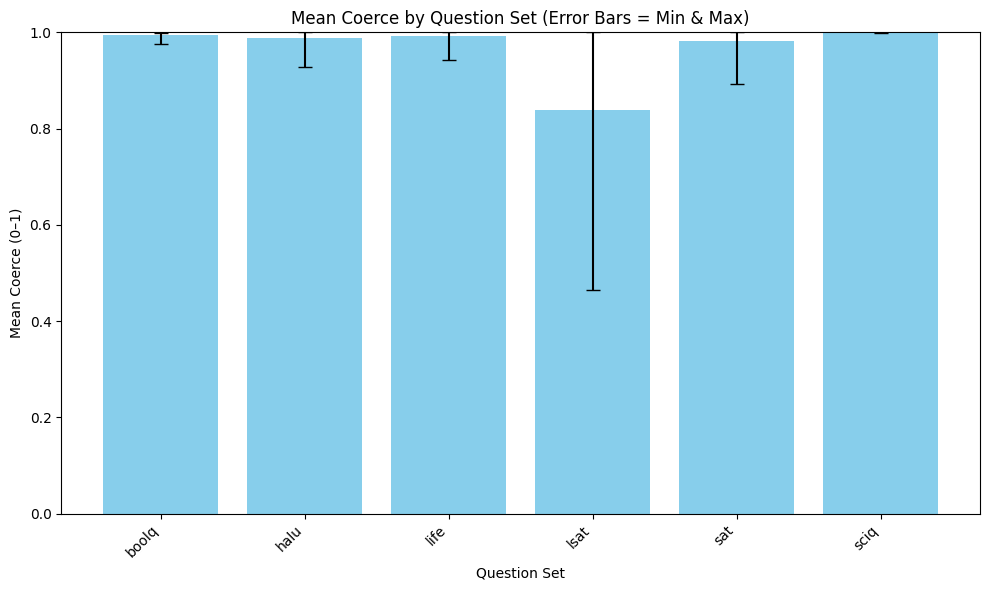

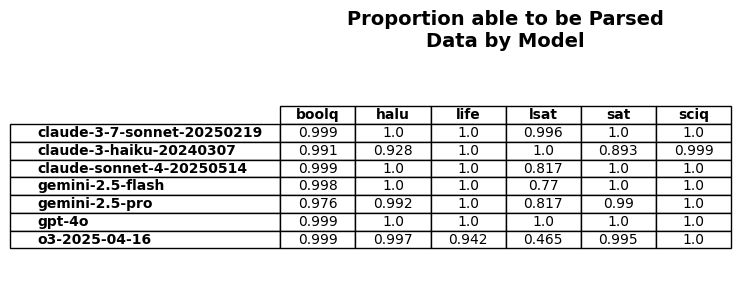

In [472]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path("NEW Parsed Results")  # change path if needed
rows = []

for provider in base_dir.iterdir():
    if provider.is_dir():
        for model_type in provider.iterdir():
            if model_type.is_dir():
                for csv_file in model_type.glob("*.csv"):
                    fname = csv_file.stem
                    question_set = fname.split("_")[0]
                    try:
                        df = pd.read_csv(csv_file)
                        if 'coerce' in df.columns:
                            mean_val = pd.to_numeric(df['coerce'], errors='coerce').mean()
                            rows.append({
                                "Model Type": model_type.name,
                                "Question Set": question_set,
                                "Mean Coerce": mean_val
                            })
                    except Exception as e:
                        print(f"Error reading {csv_file}: {e}")

results_df = pd.DataFrame(rows)

# Pivot so rows = model type, columns = question set
pivot_df = results_df.pivot_table(
    index="Model Type",
    columns="Question Set",
    values="Mean Coerce",
    aggfunc="mean"
).round(3)

display(pivot_df)
# Calculate stats per question set
means = pivot_df.mean(axis=0)
mins = pivot_df.min(axis=0)
maxs = pivot_df.max(axis=0)

# Error bar values
error_lower = means - mins
error_upper = maxs - means

plt.figure(figsize=(10, 6))
plt.bar(means.index, means.values, yerr=[error_lower, error_upper], capsize=5, color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Mean Coerce (0–1)")
plt.xlabel("Question Set")
plt.title("Mean Coerce by Question Set (Error Bars = Min & Max)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Create a clean table image
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
ax.set_title("Proportion able to be Parsed\nData by Model", fontweight='bold', fontsize=14, pad=20)
table = ax.table(
    cellText=pivot_df.round(3).values,
    colLabels=pivot_df.columns,
    rowLabels=pivot_df.index,
    cellLoc='center',
    loc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Make header bold
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold')

plt.tight_layout()
plt.show()

##  Question Set Analysis

### BoolQ

In [465]:
def get_ece(score: pd.Series, confidence: pd.Series, n_bins: int = 10):
    # Ensure inputs are clean
    score = score.astype(bool)
    confidence = confidence.astype(float)

    # Bin edges and assignments
    bin_edges = np.linspace(0.0, 1.0, n_bins + 1)
    bin_ids = np.digitize(confidence, bin_edges, right=True)

    ece = 0.0
    total_count = len(score)

    # Calculate ECE per bin
    for i in range(1, n_bins + 1):
        bin_mask = bin_ids == i
        bin_count = bin_mask.sum()
        
        if bin_count > 0:
            bin_accuracy = score[bin_mask].mean()
            bin_confidence = confidence[bin_mask].mean()
            ece += (bin_count / total_count) * abs(bin_accuracy - bin_confidence)

    return ece

def sum_token_logprobs_boolq(old_df: pd.DataFrame):
    df = old_df.copy()
    truthy = ['True', 'true', 'TRUE', 'yes', 'Yes']
    falsey = ['False', 'false', 'FALSE', 'no', 'No']

    # Strip spaces for all t-columns
    t_cols = [f"t{i}" for i in range(1, 6)]
    p_cols = [f"t{i}_prob" for i in range(1, 6)]
    df[t_cols] = df[t_cols].apply(lambda col: col.str.strip())

    # Boolean masks for truthy/falsey per cell
    mask_truthy = df[t_cols].isin(truthy)
    mask_falsey = df[t_cols].isin(falsey)

    # Multiply masks by probability columns (automatically aligns column-wise)
    df["true_sum"] = (mask_truthy * df[p_cols].to_numpy()).sum(axis=1)
    df["false_sum"] = (mask_falsey * df[p_cols].to_numpy()).sum(axis=1)

    t_prob = df['true_sum'] / (df['false_sum'] + df['true_sum'])
    f_prob = df['false_sum'] / (df['false_sum'] + df['true_sum'])

    df['true_token_prob'] = t_prob
    df['false_token_prob'] = f_prob

    return df

def add_confidence_bin(df: pd.DataFrame, col: str = 'confidence') -> pd.DataFrame:
    # Copy to avoid modifying original
    df = df.copy()

    # Clip confidence to [0, 1]
    df[col] = df[col].clip(0, 1)

    # Define bin edges and labels
    bins = np.linspace(0, 1, 11)        # 0.0, 0.1, ..., 1.0
    bins = np.append(bins, 1.0000001)    # ensure 1.0 is captured in last bin
    labels = [round(x, 1) for x in np.linspace(0.1, 1.0, 11)]

    # Assign bin label
    df['bin'] = pd.cut(
        df[col],
        bins=bins,
        labels=labels,
        ordered= False,
        right=False,   # (a, b] style
        include_lowest=False
    )

    return df

def melt_series(score: pd.Series, confidence: pd.Series):
    df = pd.DataFrame({'confidence': confidence, 'score': score})
    df = add_confidence_bin(df)
    df['score'] = df['score'].astype('int')
    #print('Binned DF:')
    #display(df)
    # Group by confidence and aggregate
    melt_df = df.groupby('bin', observed=False).agg(
        #observed=True,
        mean_score=('score', 'mean'),
        count=('score', 'size'),
        mean_confidence = ('confidence', 'mean')
    ).reset_index()


    return melt_df



#def plot_boolq_logprobs(res: pd.DataFrame, ans: pd.DataFrame):
    


In [ ]:
# -- JUNK ---
import seaborn as sns
from typing import Literal
_TYPES = Literal['None', 'logprobs', 'top100']
def run_analysis_boolq(result_file_path, answer_df, token_type: _TYPES = None):
    model_name = result_file_path.split('\\')[2]
    ## Get Relevant Data
    result_df = pd.read_csv(result_file_path)

    response_series = result_df['answer'].str.lower == 'true' # Make into boolean
    stated_confidence_series = result_df['Confidence'].astype(float)
    answer_series = answer_df['Correct Answer']
    score_series = response_series == answer_series

    ece = get_ece(score_series, stated_confidence_series)
    #plot_calibration(score_series, stated_confidence_series, n_bins = 10)

    melt_df = melt_series(score_series, stated_confidence_series)

    combined_df = pd.DataFrame({'confidence': stated_confidence_series, 'score': score_series})

    # Color Palette
    color1 = sns.color_palette('muted')[0]
    color2 = sns.color_palette('pastel')[1]

    display(melt_df)
    sns.set_theme(font='Times New Roman', style= "whitegrid")
    
    sns.histplot(
        data=melt_df,
        x="confidence",
        weights=melt_df["count"] / melt_df["count"].sum(),   # use count values as weights
        bins=len(melt_df), # one bin per unique confidence
        edgecolor="white",
        #discrete= True,
        color= color1,
        binwidth= 0.025 #melt_df['confidence'].sort_values().diff().dropna().min()

    )
    p = sns.lineplot(combined_df, 
                 x = 'confidence', 
                 y = 'score',
                 #err_style= 'bars',
                 errorbar= None,
                 color = color2,


                )
    
    sns.scatterplot(melt_df, 
                 x = 'confidence', 
                 y = 'mean_score',
                 #size= 'count'
                 color = color2
                )
    

    # sns.barplot(
    #     data=melt_df,
    #     x="confidence",
    #     y= melt_df["count"] / melt_df["count"].sum(),
    #     color="skyblue",
    #     edgecolor="white"
    # )

    # Add 45-degree reference line
    p.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=1)

    # (Optional) improve readability
    p.set_xlim(0, 1.05)
    p.set_ylim(0, 1)
    p.set_aspect('equal', adjustable='box')  # Makes it a perfect square
    title = f'Calibration Plot for {model_name} on BoolQ:\nECE: {ece:.3f}'
    p.set_title(title)
    p.set_ylabel('Average Accuracy')
    p.set_xlabel('Stated Confidence')

    p.set_xticks([0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6,0.7,0.7,0.8,0.9,1.0])
    p.figure.set_size_inches(10, 10)

    # Summary Statistics:
    min_val_score = 0
    min_val_conf = 0

    max_val_score = 0
    max_val_conf = 0


    # Plot Token Plot:
    if token_type == 'logprobs':
        plot_boolq_logprobs(result_df, gold_df)
    elif token_type == 'top100':
        plot_boolq_top100()
    else:
        print('Invalid token_type! Option must be "logprobs", "top100" or "None".')

test_path ='Parsed Results\GPT\gpt-4o\\boolq_valid_gpt-4o.csv'

ece = run_analysis_boolq(test_path, gold_df, token_type= 'dog')

# #np.mean(scores)

# comparison_df = pd.DataFrame({
#     'res': res,
#     'ans': ans,
#     'match': res == ans
# })
# display(comparison_df)
# #res[0].dtype, ans[0].dtype

ece

<>:96: SyntaxWarning: invalid escape sequence '\G'
<>:96: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Noam Michael\AppData\Local\Temp\ipykernel_72188\271763976.py:96: SyntaxWarning: invalid escape sequence '\G'
  test_path ='Parsed Results\GPT\gpt-4o\\boolq_valid_gpt-4o.csv'
C:\Users\Noam Michael\AppData\Local\Temp\ipykernel_72188\271763976.py:96: SyntaxWarning: invalid escape sequence '\G'
  test_path ='Parsed Results\GPT\gpt-4o\\boolq_valid_gpt-4o.csv'


NameError: name 'gold_df' is not defined

In [473]:
# -- KEEP
from matplotlib.patches import Patch

# base palettes per family
family_palettes = {
    "gpt":    sns.color_palette("Greens", 6),
    "claude": sns.color_palette("Blues", 6),
    "gemini": sns.color_palette("Purples", 6),
    "deepseek":  sns.color_palette("Oranges", 6),
}

# --- Color helpers: families & shades ---
def model_family(name: str) -> str:
    s = name.lower()
    if "gpt" in s or "o3" in s:   return "gpt"
    if "claude" in s:             return "claude"
    if "gemini" in s:             return "gemini"
    return "other"


def pick_color(name: str) -> tuple:
    fam = model_family(name)
    pal = family_palettes[fam]
    s = name.lower()
    # Prefer consistent shades for common variants:
    if fam == "gpt":
        if "gpt-4o" in s: return pal[-2]  # darker green
        if "o3" in s:     return pal[1]   # lighter green
    if fam == "claude":
        if "sonnet" in s: return pal[-2]
        if "haiku"  in s: return pal[2]
    if fam == "gemini":
        if "pro"   in s:  return pal[-2]
        if "flash" in s:  return pal[2]
    return pal[3]  # default mid shade



def make_summary_plots(ece_rows, acc_rows, n_rows, num_used, title_prefix="BoolQ", filename="summary_bars_boolq.png"):
    # Build dataframes
    ece_df = pd.DataFrame(ece_rows, columns=["model", "ece", "family", "color"])
    acc_df = pd.DataFrame(acc_rows, columns=["model", "acc", "family", "color"])
    n_df   = pd.DataFrame(n_rows,   columns=["model", "n",   "family", "color"])

    # Sort (family then model) and establish a consistent model order from ECE df
    ece_df = ece_df.sort_values(["family", "model"]).reset_index(drop=True)
    model_order = ece_df["model"].tolist()

    # Reindex others to match the model order
    def reorder(df, value_col):
        if df.empty:
            return df
        df = df.set_index("model").reindex(model_order).reset_index()
        # Forward-fill missing family/color if needed (rare)
        for col in ["family", "color"]:
            if col in df:
                df[col] = df[col].ffill().bfill()
        return df

    acc_df = reorder(acc_df, "acc")
    n_df   = reorder(n_df, "n")   

    # Figure and axes
    n_models = len(model_order)
    fig_w = max(14, 0.6 * n_models + 10)  # scale width with #models
    fig, axes = plt.subplots(1, 3, figsize=(fig_w, 6), sharex=False)

    # Panel configs
    panels = [
        (ece_df, "ece", "ECE", f"{title_prefix} — Expected Calibration Error"),
        (acc_df, "acc", "Accuracy", f"{title_prefix} — Accuracy by Model"),
        (n_df,   "n",   "Count (n)", f"{title_prefix} — Usable Rows by Model"),
    ]

    # Draw bars
    for ax, (df, val_col, y_label, title) in zip(axes, panels):
        #display(df)
        #if df.empty:
        #     ax.set_axis_off()
        #     ax.set_title(f"{title}\n(no data)")
        #     continue
        #display(df[val_col])
        x = df["model"]
        y = np.array(df[val_col])


        ax.bar(x, y, color=list(df["color"]), linewidth = 0)
        ax.set_ylabel(y_label)
        ax.set_title(title)

        # Y-lims: probabilities on [0,1], counts auto
        if val_col in ("ece"):
            ax.set_ylim(0, 1)
        else:
            ymax = (df[val_col].max() or 0) * 1.10
            ax.set_ylim(0, max(1, ymax))

        if "Usable Rows" in title:
            min_val = num_used
            ax.axhline(min_val, color="grey", linestyle="--", linewidth=1.5)

            ax.text(
                1.01, min_val,                       # X=just outside plot (normalized coords), Y=actual val
                f"{min_val:.0f}",                    # format as integer (change to .2f if decimals matter)
                va="center", ha="left", color="black",
                transform=ax.get_yaxis_transform()   # ensures y is in data coords, x is relative (0–1)
            )
        

        # Rotate x labels for readability
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # Deprecated method
        ax.set_xticks(ax.get_xticks())  # explicitly set tick positions
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # Build a single legend from families present
    families_present = pd.concat([ece_df["family"], acc_df["family"], n_df["family"]], axis=0).dropna().unique().tolist()
    #print(families_present)
    # Expect a dict named family_palettes in scope; fall back to greys if missing
    legend_patches = []
    for fam in families_present:
        try:
            face = family_palettes.get(fam, None)
            if face is None:
                raise KeyError
            face = face[3]  # a mid shade
        except Exception:
            # fallback color if palette not defined for this family
            face = "#cfcfcf"
        # Prettify family label
        fam_label = fam.capitalize()
        legend_patches.append(Patch(facecolor=face, label=fam_label))

    if legend_patches:
        # Put legend under the middle subplot
        axes[0].legend(handles=legend_patches, title="Model Families", frameon=True, loc="upper left")
    fig.suptitle(f"Summary Statistics for {title_prefix}", fontsize=16, y=1.02)
    plt.tight_layout()

    # Save once
    filename = f"summary_bars_{title_prefix.lower()}.png"
    out_path = output_dir / filename  # assumes output_dir exists
    fig.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close(fig)
    return out_path


import pandas as pd
import numpy as np

def compute_overconfidence(df: pd.DataFrame):
    """
    Compute mean confidence, accuracy, and overconfidence for one LLM–question set.
    
    Parameters
    ----------
    df : pd.DataFrame
        Must contain columns ['A','B','C','D','E','Correct Answer Letter'] 
        where A–E are probabilities (floats summing to 1 per row).
    
    Returns
    -------
    dict with mean_confidence, accuracy, overconfidence
    """

    
    # Columns with option probs
    option_cols = ['A','B','C','D','E']
    
    # Confidence per question = highest assigned probability
    max_probs = df[option_cols].max(axis=1)

    # For ties, find which answers are tied for max
    is_max = df[option_cols].eq(max_probs, axis=0)
    n_ties = is_max.sum(axis=1)  # number of options tied for max
    
    # Did the correct answer get max probability?
    correct_mask = [c for c in df['Correct Answer Letter']]
    correct_is_max = is_max.lookup(df.index, correct_mask)
    
    # Per-question accuracy: 1/k if correct is among ties, else 0
    per_question_acc = np.where(correct_is_max, 1/n_ties, 0)
    
    # Aggregate
    mean_conf = max_probs.mean()
    accuracy = per_question_acc.mean()
    overconf = mean_conf - accuracy
    
    return {
        "mean_confidence": mean_conf,
        "accuracy": accuracy,
        "overconfidence": overconf
    }




def calibration_plot(
        scores: pd.Series, 
        confidence: pd.Series, 
        n_bins: int = 10,
        model_name: str = '',
        qset_name: str = '',
        num_complete: int = None,
        title: str = None
        ):
    # Ensure inputs are numpy arrays
    scores = scores.astype(int).to_numpy()
    confidence = confidence.astype(float).to_numpy()
    
    # Calculate ECE and Accuracy
    ece = get_ece(pd.Series(scores), pd.Series(confidence), n_bins=n_bins)
    acc = np.mean(scores)

    melted = melt_series(score=scores, confidence=confidence)
    #display(melted)

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))

    ## Line of Well Calibration
    ax.plot([0, 1.1], [0, 1.1], linestyle='--', color='grey')

    ## Histogram:
    ax.bar(
        melted['mean_confidence'].fillna(0), 
        melted['count'].fillna(0) / melted['count'].sum(), 
        width=0.025, 
        align='center', 
        edgecolor='white',
        color = 'orange'
        )
    ax.scatter(melted['mean_confidence'], melted['mean_score'])


    ## Error Bars:
    # Standard error for a proportion
    stderr = np.sqrt((melted['mean_score'] * (1 - melted['mean_score'])) / melted['count'])
    stderr = stderr.fillna(0)  # no error if count = 0 or NaN

    ax.errorbar(melted['mean_confidence'], 
                melted['mean_score'], 
                yerr = stderr,  
                fmt='o', 
                ecolor='grey', 
                capsize=5,
                #linestyle = 'none'
                )
    
    ax.scatter(melted['mean_confidence'], melted['mean_score'], color = 'blue')


    # 45-degree reference line


    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel('Stated Confidence')
    ax.set_ylabel('Average Accuracy', labelpad= 15)
    if title is not None:
        ax.set_title(f'{title}\nECE: {ece:.3f} | Accuracy: {acc:.3f} | n = {num_complete}')
    else:
        ax.set_title(f'Calibration Plot for {model_name} on {qset_name}\nECE: {ece:.3f} | Accuracy: {acc:.3f} | n = {num_complete}' )
    ticks = [0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6,0.7,0.7,0.8,0.9,1.0]
    labels = [0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6,0.7,0.7,0.8,0.9,1.0]
    ax.set_xticks(ticks= ticks, labels=labels)

    # Create a secondary y-axis for proportion
    ax2 = ax.twinx()
    ax.set_ylim(0, 1.1)
    ax2.set_ylabel('Proportion of Stated Confidence',rotation=-90, labelpad= 15)

    ax.set_ylim(0, 1.1)
    ax2.set_ylim(0, 1.1)
    #ax.grid(False)   # turn off grid for left axis
    #ax2.grid(False)  # turn off grid for right axis


    # --- Save Plot ---
    filename = f"cal_plot_{qset_key.lower()}_{model_key}.png"
    out_path = output_dir / "Calibration Plots"  / filename  # assumes output_dir exists
    fig.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close(fig)
    
    #plt.tight_layout()
    #plt.show()

    return ece, acc
    
def mcq_calibration_plot(df: pd.DataFrame,
        options: list = [],
        gold_column: str = 'Correct Answer Letter',
        answer_column: str = 'Answer',
        n_bins: int = 10,
        model_name: str = '',
        qset_name: str = '',
        num_complete: int = None,
        title: str = None,
        show = False,
        save = True
        ):
    

    # Calculate ECE and Accuracy before melting df

    summary_df =  pd.DataFrame({
        "answer": df[options].idxmax(axis=1),      # letter with max prob
        "confidence": df[options].max(axis=1)      # highest prob
    })
    summary_df['score'] = summary_df['answer'].str.lower().str.strip() == df[gold_column].str.lower().str.strip()
    

    ece = get_ece(summary_df["score"], summary_df["confidence"], n_bins=n_bins)
    acc = np.mean(summary_df["score"])


    # Now melt df to get what we need for plots
    melted = df.melt(
        id_vars=['Question ID', gold_column],
        value_vars=options,
        var_name='Option',
        value_name='confidence'
        )

    #display(full_df)
    melted = melted.sort_values(["Question ID", "Option"])


    #print(full_df.shape)

    melted['score'] = (melted[gold_column].str.strip() == melted['Option']).astype(int)
    melted

    scores = melted['score']
    confidence = melted['confidence']

    

    melted = melt_series(score=scores, confidence=confidence)
    #display(melted)

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))

    ## Line of Well Calibration
    ax.plot([0, 1.1], [0, 1.1], linestyle='--', color='grey')

    ## Histogram:
    ax.bar(
        melted['mean_confidence'].fillna(0), 
        melted['count'].fillna(0) / melted['count'].sum(), 
        width=0.025, 
        align='center', 
        edgecolor='white',
        color = 'orange'
        )
    ax.scatter(melted['mean_confidence'], melted['mean_score'])


    ## Error Bars:
    # Standard error for a proportion
    stderr = np.sqrt((melted['mean_score'] * (1 - melted['mean_score'])) / melted['count'])
    stderr = stderr.fillna(0)  # no error if count = 0 or NaN

    ax.errorbar(melted['mean_confidence'], 
                melted['mean_score'], 
                yerr = stderr,  
                fmt='o', 
                ecolor='grey', 
                capsize=5,
                #linestyle = 'none'
                )
    
    ax.scatter(melted['mean_confidence'], melted['mean_score'], color = 'blue')


    # 45-degree reference line


    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel('Stated Confidence')
    ax.set_ylabel('Average Accuracy', labelpad= 15)
    if title is not None:
        ax.set_title(f'{title}\nECE: {ece:.3f} | Accuracy: {acc:.3f} | n = {num_complete}')
    else:
        ax.set_title(f'Calibration Plot for {model_name} on {qset_name}\nECE: {ece:.3f} | Accuracy: {acc:.3f} | n = {num_complete}' )
    ticks = [0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6,0.7,0.7,0.8,0.9,1.0]
    labels = [0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6,0.7,0.7,0.8,0.9,1.0]
    ax.set_xticks(ticks= ticks, labels=labels)

    # Create a secondary y-axis for proportion
    ax2 = ax.twinx()
    ax.set_ylim(0, 1.1)
    ax2.set_ylabel('Proportion of Stated Confidence',rotation=-90, labelpad= 15)

    ax.set_ylim(0, 1.1)
    ax2.set_ylim(0, 1.1)
    #ax.grid(False)   # turn off grid for left axis
    #ax2.grid(False)  # turn off grid for right axis


    # --- Save Plot ---
    filename = f"cal_plot_{qset_key.lower()}_{model_key}.png"
    out_path = output_dir / "Calibration Plots"  / filename  # assumes output_dir exists
    
    if save:
        fig.savefig(out_path, dpi=300, bbox_inches="tight")
        plt.close(fig)
    if show:
        plt.tight_layout()
        plt.show()

    return ece, acc



## Main Plots

In [474]:
## Make All Plots
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

model_names = {
    "GPT": {
        "gpt-4o": "GPT-4o",
        "o3-2025-04-16": "GPT-o3",
    },
    "Claude":{
        "claude-sonnet-4-20250514": "Claude-Sonnet-4",
        "claude-3-7-sonnet-20250219": "Claude-Sonnet-3.7",
        "claude-3-haiku-20240307": "Claude Haiku 3",
    },
    "Gemini":{
        "gemini-2.5-pro": "Gemini-2.5-Pro",
        "gemini-2.5-flash": "Gemini-2.5-Flash"
    }
}

qsets = {
    "boolq_valid": "BoolQ",
    "halu_eval_qa": "HaluEval",
    "life_eval": "LifeEval",
    "lsat_ar_test": "LSAT-AR",
    "sat_en": "SAT-EN",
    "sciq_test": "SciQ"
}

response_map = {
    'true': True,
    'false': False,
    'a': 'A',
    'b': 'B',
    'c': 'C',
    'd': 'D',
    'e': 'E'
}

mcq_qsets = ['LSAT-AR', 'SAT-EN', 'SciQ']


folder = "NEW Parsed Results"
folder_gold = "Formatted Benchmarks"
dfs = {}  # store DataFrames in a dict keyed by (qset_name, model_display)
completions = {}

for qset_key, qset_name in qsets.items():

    print(f"{qset_name}:")
    output_dir = Path("Plots") / qset_name
    output_dir.mkdir(parents=True, exist_ok=True)
    dfs[qset_name] = {}
    completions[qset_name] = {}
    # Get gold_df for this qset
    gold_filename =  f"{qset_key}_formatted.csv"
    gold_path = os.path.join(folder_gold, gold_filename)
    print(f"    ✅{gold_filename}")
    if os.path.exists(gold_path):
        gold_df = pd.read_csv(gold_path)
    else:
        print(f"Missing gold file: {gold_path}")
        gold_df = None
        continue
    
    for model_group, models in model_names.items():
        print(f"    {model_group}:")

        # --- Iterate over each model in group ---
        for model_key, model_display in models.items():
            filename = f"{qset_key}_{model_key}.csv"
            filepath = os.path.join(folder, model_group, model_key, filename)
            completions[model_display] = {}
            # --- Get the Parsed Result CSV ---
            if os.path.exists(filepath):
                df = pd.read_csv(filepath)
                dfs[qset_name][model_display] = df
                print(f"        ✅{filename}")
            else:
                print(f"Missing: {filepath}")

            n = df['coerce'].astype(bool).sum()

            completions[qset_name][model_display] = n

    print(f"✅All Dataframes Imported for {qset_name}!\nRunning Analysis:")

    # --- Find Usable IDs ---
    # if qset_name != 'LifeEval' and qset_name != 'HaluEval':                 # Add logic for these two
    #     continue
    if qset_name != 'HaluEval' and qset_name != 'LifeEval':
        models_dict = dfs[qset_name]
        valid_ids = {
            qset_name: set.intersection(*[
                set(
                    df.loc[
                        df['Answer'].astype(str).str.strip().str.lower()
                                .map(response_map).notna(), 
                        'Question ID'
                        ]
                    )
                for df in models_dict.values()
            ])
            #for qset_name, models_dict in dfs.items()
        }
        
    elif qset_name == 'HaluEval':
        models_dict = dfs[qset_name]
        valid_ids = {
            qset_name: set.intersection(*[
                set(
                    df.loc[
                        df['Confidence'].notna(),  # HaluEval only looks for confidence values
                        'Question ID'
                        ]
                    )
                for df in models_dict.values()
            ])
            #for qset_name, models_dict in dfs.items()
        }
    elif qset_name == 'LifeEval':
        models_dict = dfs[qset_name]
        valid_ids = {
            qset_name: set.intersection(*[
                set(
                    df.loc[
                        (pd.to_numeric( df['Answer'], errors='coerce').notna()) &
                        (pd.to_numeric( df['Confidence'], errors='coerce').notna()),
                        'Question ID'
                    ]
                )
                for df in models_dict.values()
            ])
        }

    # --- Convert DFs to only usable IDs ---
    ids = {str(x) for x in valid_ids[qset_name]}
    gold_df = gold_df[gold_df['Question ID'].astype(str).isin(ids)].reset_index(drop=True)
    print(f"Usable Rows: {len(ids)}")                                         # This doesn't match with the n outputted? Must debug
    old_dfs = dfs.copy()
    for model_display, df in dfs[qset_name].items():

        mask = df['Question ID'].astype(str).isin(ids)



        #print(gold_df.columns)
        
        dfs[qset_name][model_display] = df.loc[mask].copy()

    # --- Run Summary Analysis ---                                            # This method may not be best implementation.

    ece_rows = []
    acc_rows = []
    n_rows = []
    n_used = len(ids)
    for model_group, models in model_names.items():
        for model_key, model_display in models.items():

            # --- Get Response Confidence and Scores Series ---                 ## Need to do
            if qset_name == 'BoolQ': 
                df = dfs[qset_name][model_display]
                response_orig = df['Answer']
                response = (response_orig.astype(str).str.strip().str.lower()
                            .map(response_map)
                            ).reset_index(drop = True)
                confidence = df['Confidence']
                scores = gold_df['Correct Answer'] == response.astype('bool')
            elif qset_name == 'HaluEval':
                df =  dfs[qset_name][model_display]                             # Need to do
                confidence = df['Confidence'] 
                scores = df['Question ID'].str.contains('_r') # Marker for real/ hallucinated answer

            elif qset_name == 'LifeEval':
                df = dfs[qset_name][model_display]

                # Get Radius
                radius_list = [1, 5, 10, 20]
                # Get the modulus of QID then use that as an index for radius_list such that 0-> 1, 1-> 5, 2-> 10, 3-> 20
                mod_qid = df['Question ID'].astype('int').apply(lambda x: x % 4)


                rads = mod_qid.apply(lambda i: radius_list[i])
                df['radius'] = rads

                # Get True age
                true_val = gold_df['True Lifespan']

                # Get Answer:

                response = df['Answer']

                df['Expected Age'] = true_val


                scores = (
                    (df['Answer'].astype(float) >= df['Expected Age'] - df['radius']) &
                    (df['Answer'].astype(float) <= df['Expected Age'] + df['radius'])
                ).astype(int)

                confidence = df['Confidence']
                

            elif qset_name == 'LSAT-AR':
                full_df = dfs[qset_name][model_display]


                full_df = full_df.merge(
                    gold_df[['Question ID', 'Correct Answer Letter']],
                    on='Question ID',
                    how='inner',
                    validate='one_to_one'
                )

                answer_options = ['A', 'B', 'C', 'D', 'E']
                gold_column_name = "Correct Answer Letter"

            elif qset_name == 'SAT-EN':

                full_df = dfs[qset_name][model_display]


                full_df = full_df.merge(
                    gold_df[['Question ID', 'Correct Answer Letter']],
                    on='Question ID',
                    how='inner',
                    validate='one_to_one'
                )

                answer_options = ['A', 'B', 'C', 'D']
                gold_column_name = "Correct Answer Letter"
            elif qset_name == 'SciQ':
                full_df = dfs[qset_name][model_display]


                full_df = full_df.merge(
                    gold_df[['Question ID', 'Correct Answer Letter']],
                    on='Question ID',
                    how='inner',
                    validate='one_to_one'
                )

                answer_options = ['A', 'B', 'C', 'D']
                gold_column_name = "Correct Answer Letter"
            else:
                print(f'Invalid Q-Set! {qset_name} not found!')

            if qset_name in mcq_qsets:
                ece, acc = mcq_calibration_plot(full_df, 
                                                options= answer_options, 
                                                gold_column= gold_column_name, 
                                                model_name = model_display, 
                                                qset_name = qset_name, 
                                                num_complete = n_used
                                                )
                acc = acc * 100

                #n = old_dfs[qset_name][model_display]['answer'].notna().sum()
                n = completions[qset_name][model_display]

             # --- Make Calibration Plot --- # Need to do
            else:
                n = completions[qset_name][model_display]
                acc = np.mean(scores) *100
                ece = get_ece(scores, confidence)
                calibration_plot(scores= scores, confidence = confidence, model_name = model_display, qset_name = qset_name, num_complete = n_used)

            # --- Summary Stats ---
            print(f"         Raw Summary Stats:{model_display}")
            print(f"                Accuracy: {acc:.2f}%")
            print(f"                     ECE: {ece:.3f}")
            print(f"                       n: {n}")

            # --- Add Summary Stats ---
            fam = model_family(model_display)
            color = pick_color(model_display)
            ece_rows.append((model_display, float(ece), fam, color))
            acc_rows.append((model_display, acc, fam, color))
            n_rows.append((model_display, float(n), fam, color))


            
    # --- Analysis Plots ---
    output_dir = Path("Plots") / qset_name 
    output_dir.mkdir(parents=True, exist_ok=True)
    make_summary_plots(ece_rows, acc_rows, n_rows, n_used, title_prefix = qset_name)
    
    # if qset_name == 'BoolQ':

    # #     make_summary_plots(ece_rows, acc_rows, n_rows, n_used, title_prefix = qset_name)
    # # elif qset_name == 'HaluEval':
        
    # #     output_dir = Path("Plots") / "HaluEval" 
    # #     output_dir.mkdir(parents=True, exist_ok=True)

    # #     # --- Make Summary Plots ---
    # #     #find_cutoff_n

    # #     ## Note: I want a grey dotted line showing where the cutoff n was 
    # #     make_summary_plots(ece_rows, acc_rows, n_rows, n_used, title_prefix = qset_name)


BoolQ:
    ✅boolq_valid_formatted.csv
    GPT:
        ✅boolq_valid_gpt-4o.csv
        ✅boolq_valid_o3-2025-04-16.csv
    Claude:
        ✅boolq_valid_claude-sonnet-4-20250514.csv
        ✅boolq_valid_claude-3-7-sonnet-20250219.csv
        ✅boolq_valid_claude-3-haiku-20240307.csv
    Gemini:
        ✅boolq_valid_gemini-2.5-pro.csv
        ✅boolq_valid_gemini-2.5-flash.csv
✅All Dataframes Imported for BoolQ!
Running Analysis:
Usable Rows: 2790
         Raw Summary Stats:GPT-4o
                Accuracy: 83.94%
                     ECE: 0.089
                       n: 3268
         Raw Summary Stats:GPT-o3
                Accuracy: 84.98%
                     ECE: 0.042
                       n: 3268
         Raw Summary Stats:Claude-Sonnet-4
                Accuracy: 82.90%
                     ECE: 0.086
                       n: 3268
         Raw Summary Stats:Claude-Sonnet-3.7
                Accuracy: 81.43%
                     ECE: 0.135
                       n: 3267
         Raw 

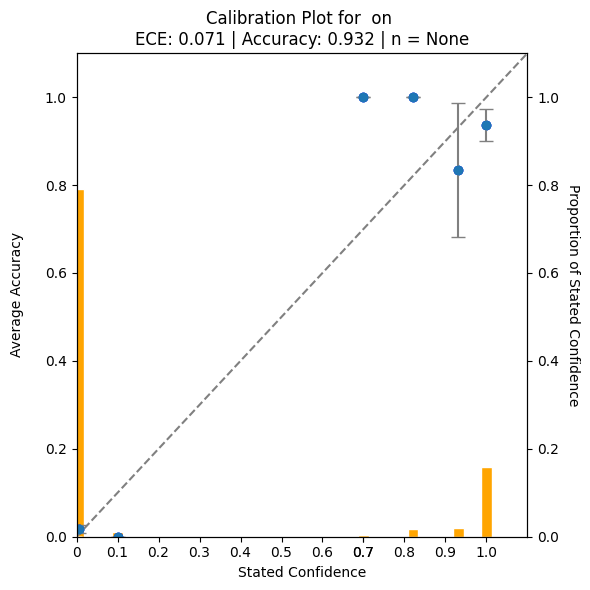

(0.07101694915254234, 0.9322033898305084)

In [207]:
lsat_df
gold_df = pd.read_csv("Formatted Benchmarks\\lsat_ar_test_formatted.csv")
qset_name = "LSAT-AR"


models_dict = dfs[qset_name]
valid_ids = {
    qset_name: set.intersection(*[
        set(
            df.loc[
                df['Answer'].astype(str).str.strip().str.lower()
                        .map(response_map).notna(), 
                'Question ID'
                ]
            )
        for df in models_dict.values()
    ])
    #for qset_name, models_dict in dfs.items()
}
ids = {str(x) for x in valid_ids[qset_name]}
gold_df = gold_df[gold_df['Question ID'].astype(str).isin(ids)].reset_index(drop=True)

# --- Only need this part ---

full_df = lsat_df.copy()

full_df = full_df.merge(
    gold_df[['Question ID', 'Correct Answer Letter']],
    on='Question ID',
    how='inner',
    validate='one_to_one'
)
full_df

melted = full_df.melt(
      id_vars=['Question ID', 'Correct Answer Letter'],
      value_vars=['A', 'B', 'C', 'D', 'E'],
      var_name='Option',
      value_name='confidence'
    )

#display(full_df)
melted = melted.sort_values(["Question ID", "Option"])


#print(full_df.shape)

melted['score'] = (melted['Correct Answer Letter'].str.strip() == melted['Option']).astype(int)
melted

scores = melted['score']
confidence = melted['confidence']

np.mean(scores)

full_df

letter_options = ['A', 'B', 'C', 'D', 'E']

mcq_calibration_plot(full_df, options= letter_options, save= False, show= True)


In [ ]:


# --- Where to save ---
output_dir = Path("Plots") / "BoolQ" / "Calibration Plots"
output_dir.mkdir(parents=True, exist_ok=True)

# --- Color helpers: families & shades ---
def model_family(name: str) -> str:
    s = name.lower()
    if "gpt" in s or "o3" in s:   return "gpt"
    if "claude" in s:             return "claude"
    if "gemini" in s:             return "gemini"
    return "other"

# base palettes per family
family_palettes = {
    "gpt":    sns.color_palette("Greens", 6),
    "claude": sns.color_palette("Blues", 6),
    "gemini": sns.color_palette("Purples", 6),
    "other":  sns.color_palette("Greys", 6),
}

def pick_color(name: str) -> tuple:
    fam = model_family(name)
    pal = family_palettes[fam]
    s = name.lower()
    # Prefer consistent shades for common variants:
    if fam == "gpt":
        if "gpt-4o" in s: return pal[-2]  # darker green
        if "o3" in s:     return pal[1]   # lighter green
    if fam == "claude":
        if "sonnet" in s: return pal[-2]
        if "haiku"  in s: return pal[2]
    if fam == "gemini":
        if "pro"   in s:  return pal[-2]
        if "flash" in s:  return pal[2]
    return pal[3]  # default mid shade

# --- Collect ECEs here ---
ece_rows = []   # (model_name, ece, family, color)

for provider in base_dir.iterdir():
    if not provider.is_dir():
        continue
    for model_type in provider.iterdir():
        if not model_type.is_dir():
            continue

        files = [p for p in model_type.glob("*.csv") if "boolq" in p.stem]
        n = len(files)
        if n == 0:
            continue

        # One figure per model_type, multiple subplots side-by-side
        fig, axes = plt.subplots(1, n, figsize=(6 * n, 6))
        for i, csv_file in enumerate(files):
            ax = axes[i] if n > 1 else axes

            df = pd.read_csv(csv_file)
            # Adjust this parse if your filename pattern differs
            model_name = csv_file.stem.split("boolq_valid_")[0].rstrip("_- ")
            print(csv_file.stem)

            ece = run_analysis_boolq(df, gold_df, model_name, ax=ax)
            fam = model_family(model_name)
            color = pick_color(model_name)
            ece_rows.append((model_name, float(ece), fam, color))

            # Save the subplot figure (full figure with all subplots is saved each loop; fine if you want one per model too)
            fig_path = output_dir / f"cal_plot_boolq_{model_name}.png"
            fig.savefig(fig_path, dpi=300, bbox_inches="tight")

        plt.tight_layout()
        plt.close(fig)

# --- Build and save the ECE bar chart across all models ---
if ece_rows:
    ece_df = pd.DataFrame(ece_rows, columns=["model", "ece", "family", "color"])
    # Sort for nicer grouping (family then model)
    ece_df = ece_df.sort_values(["family", "model"]).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(max(8, 0.6 * len(ece_df) + 4), 6))
    ax.bar(ece_df["model"], ece_df["ece"], color=list(ece_df["color"]))
    ax.set_ylabel("ECE")
    ax.set_title("BoolQ — Expected Calibration Error by Model")
    ax.set_ylim(0, 1)
    ax.tick_params(axis="x", rotation=45, ha="right")

    # Legend showing family hues
    legend_patches = [
        Patch(facecolor=family_palettes["gpt"][3],    label="GPT (greens)"),
        Patch(facecolor=family_palettes["claude"][3], label="Claude (blues)"),
        Patch(facecolor=family_palettes["gemini"][3], label="Gemini (purples)"),
        Patch(facecolor=family_palettes["other"][3],  label="Other (greys)"),
    ]
    ax.legend(handles=legend_patches, title="Model Families", frameon=True)

    bar_path = output_dir / "ece_bar_boolq.png"
    fig.savefig(bar_path, dpi=300, bbox_inches="tight")
    plt.close(fig)


def make_summary_plots(ece_rows, output_dir = ''):
    ece_df = pd.DataFrame(ece_rows, columns=["model", "ece", "family", "color"])
    # Sort for nicer grouping (family then model)
    ece_df = ece_df.sort_values(["family", "model"]).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(max(8, 0.6 * len(ece_df) + 4), 6))
    ax.bar(ece_df["model"], ece_df["ece"], color=list(ece_df["color"]))
    ax.set_ylabel("ECE")
    ax.set_title("BoolQ — Expected Calibration Error by Model")
    ax.set_ylim(0, 1)
    ax.tick_params(axis="x", rotation=45, ha="right")

    # Legend showing family hues
    legend_patches = [
        Patch(facecolor=family_palettes["gpt"][3],    label="GPT (greens)"),
        Patch(facecolor=family_palettes["claude"][3], label="Claude (blues)"),
        Patch(facecolor=family_palettes["gemini"][3], label="Gemini (purples)"),
        Patch(facecolor=family_palettes["other"][3],  label="Other (greys)"),
    ]
    ax.legend(handles=legend_patches, title="Model Families", frameon=True)

    bar_path = output_dir / "ece_bar_boolq.png"
    fig.savefig(bar_path, dpi=300, bbox_inches="tight")
    plt.close(fig)